# Aircraft Vibe Clustering

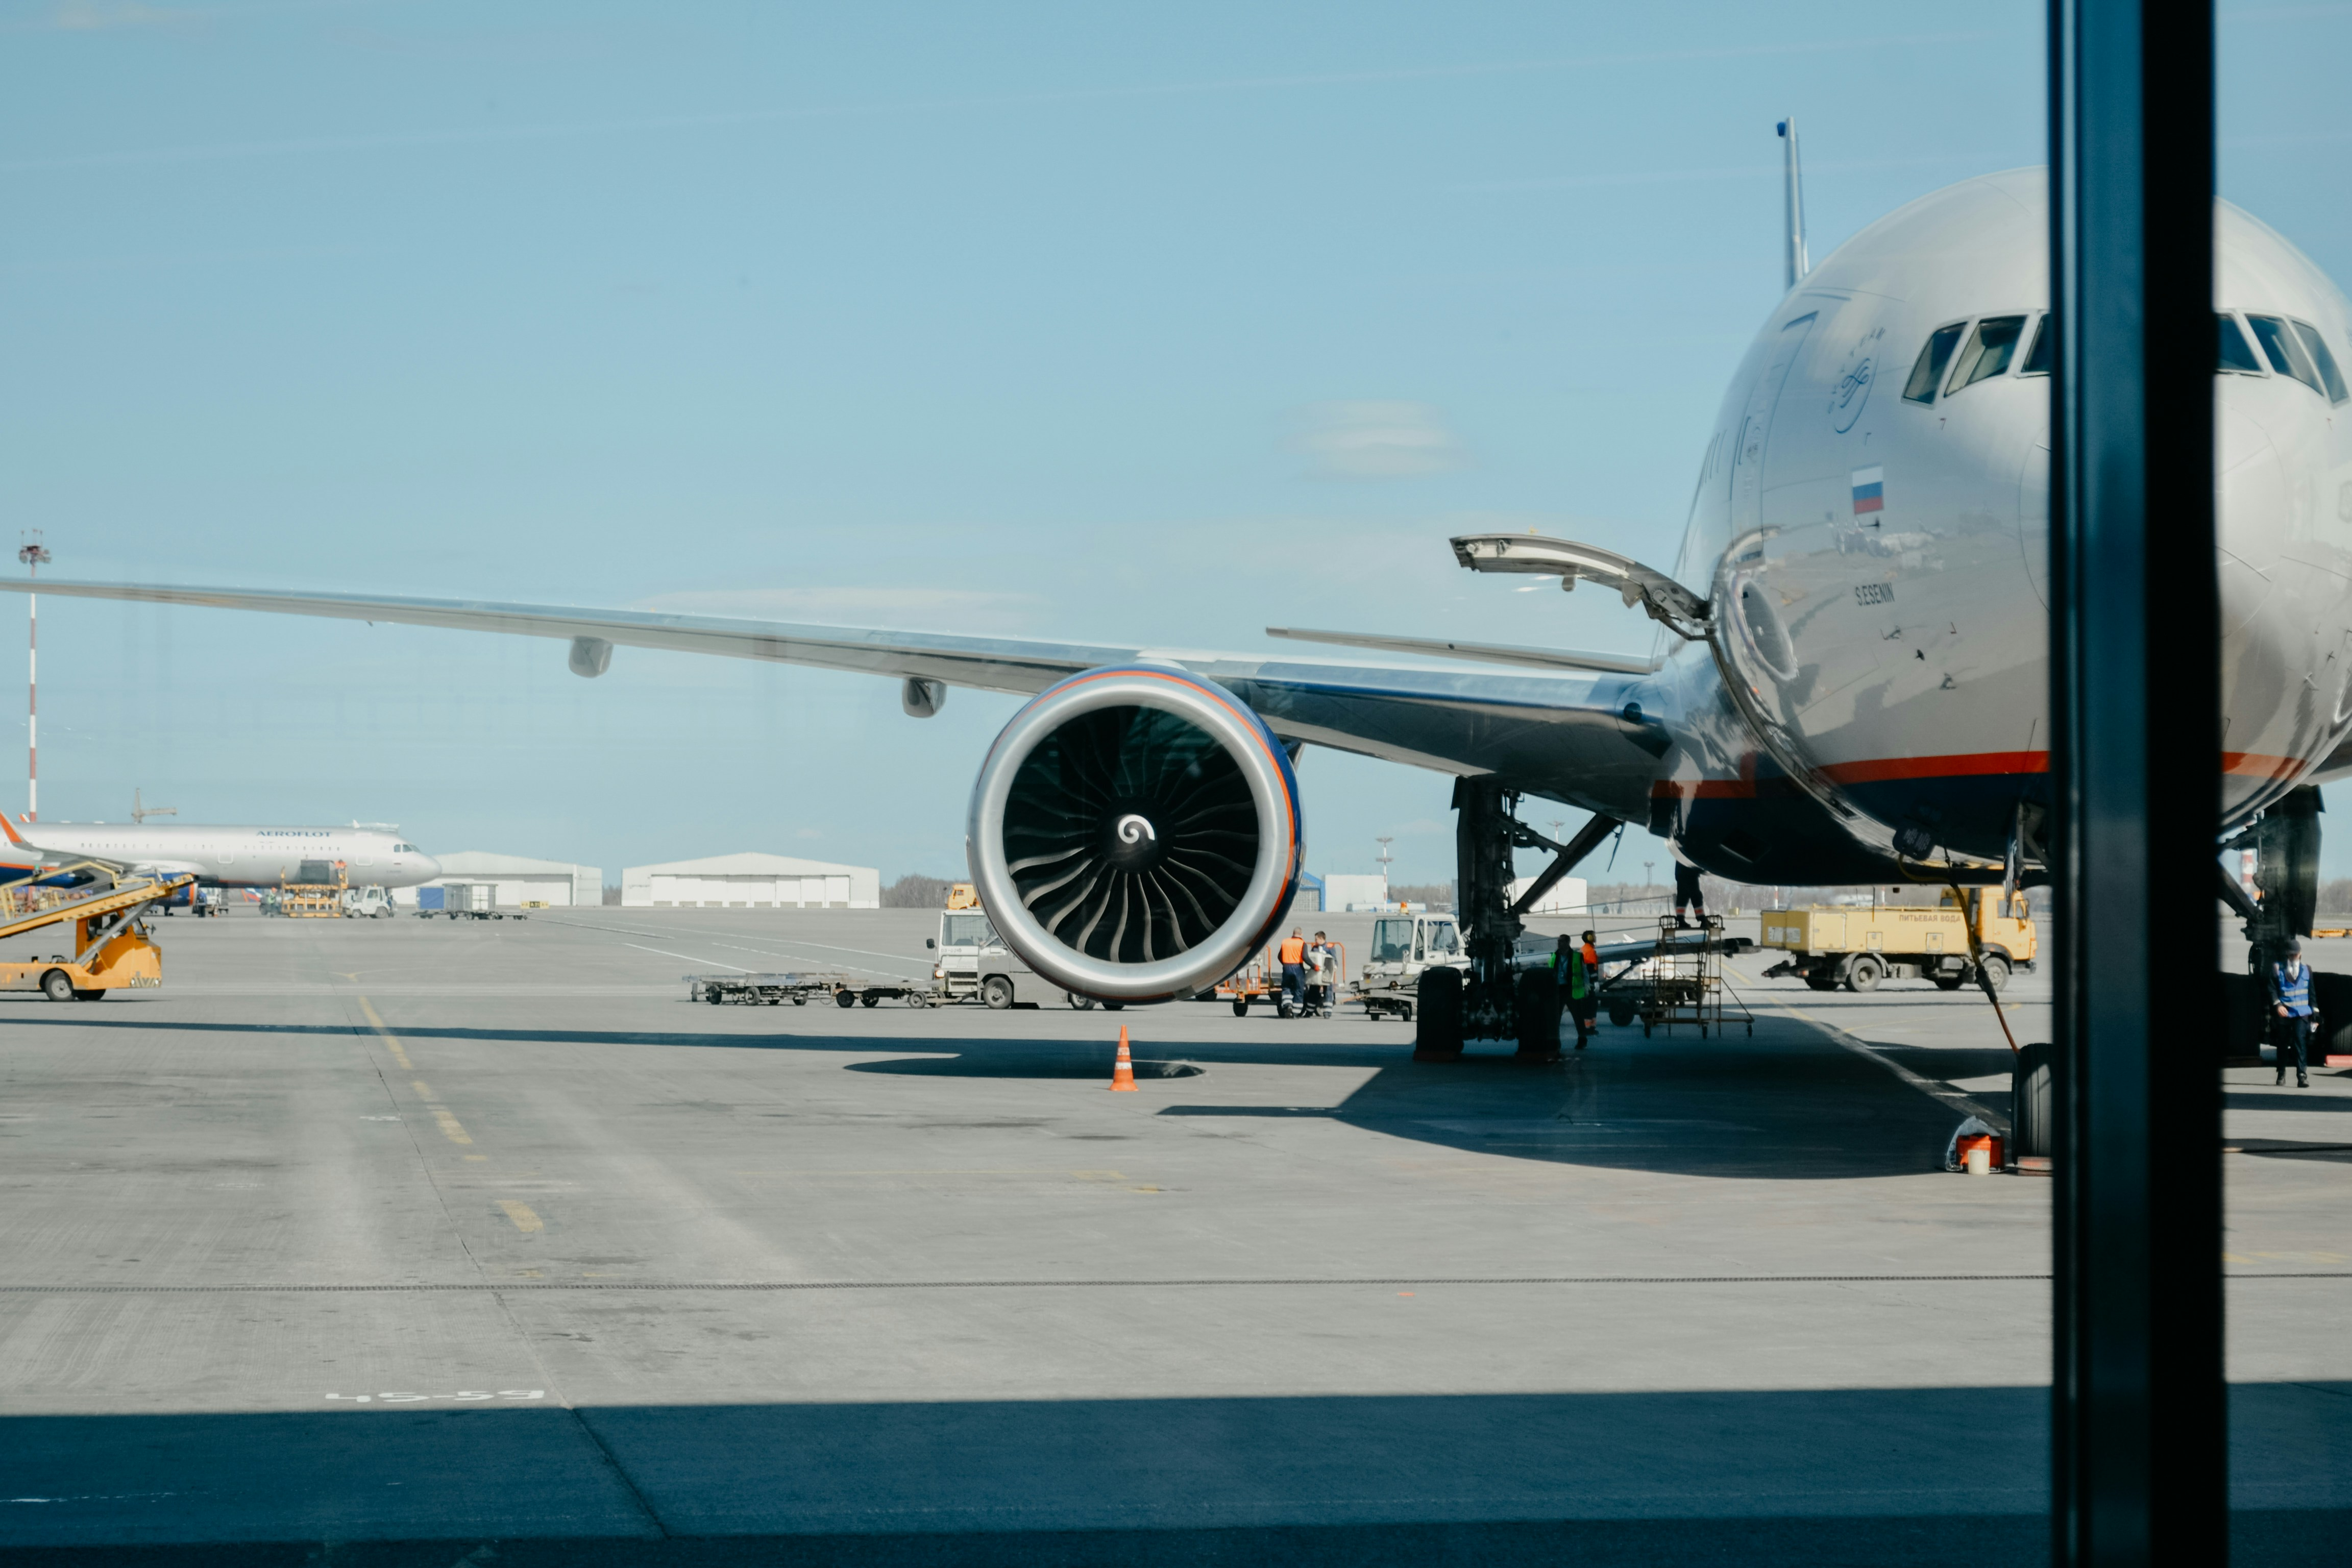

**Problem Statement:**

Cluster vibration data from aircraft engines (N1, N2, LPT) into normal and high-vibration conditions to help predict when maintenance is required.

We'll attempt this by evaluating model accuracy by comparing clusters with actual maintenance records.

In [183]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

In [184]:
df = pd.read_csv("sensor_data.csv")

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17946 entries, 0 to 17945
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n1      17946 non-null  float64
 1   n2      17946 non-null  float64
 2   lpt     17946 non-null  float64
 3   mx      17946 non-null  object 
dtypes: float64(3), object(1)
memory usage: 560.9+ KB


In [186]:
df.head()

,n1,n2,lpt,mx
0,2.575552,2.537612,1.750775,no
1,2.612895,2.093582,2.724923,no
2,2.282858,2.402350,1.640929,no
3,2.230937,2.433754,2.170824,no
4,2.366231,2.273261,2.588331,no


In [187]:
df.describe()

,n1,n2,lpt
count,17946.000000,17946.000000,17946.000000
mean,2.399736,2.446287,2.407110
std,0.619356,0.774774,0.697991
min,0.878710,0.543608,0.685517
25%,2.029046,2.032793,2.024307
50%,2.307604,2.319315,2.307239
75%,2.611133,2.614950,2.598000
max,5.095344,6.189417,5.965598


# EDA

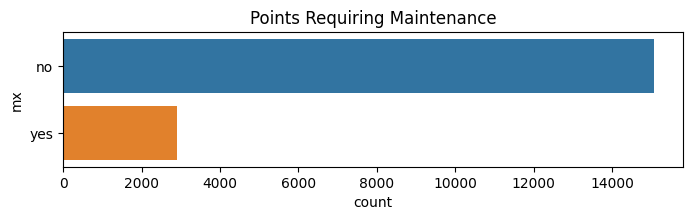

In [188]:
plt.figure(figsize=(8,1.75))
sns.countplot(data=df,y='mx',hue='mx')
plt.title('Points Requiring Maintenance');

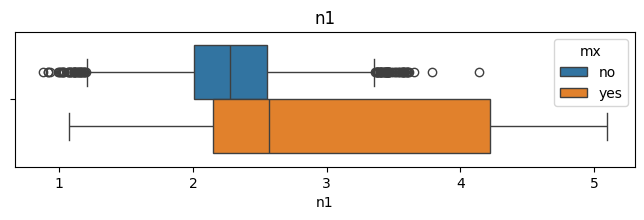

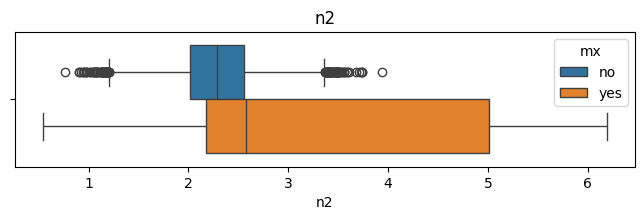

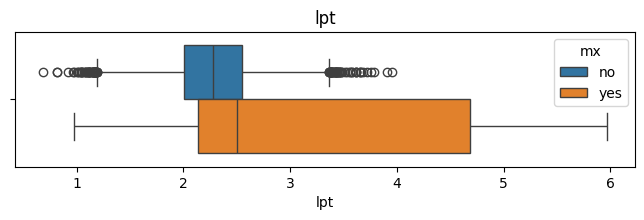

In [189]:
for col in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8,1.75))
  sns.boxplot(data=df,x = col, hue='mx')
  plt.title(col)
  plt.show()

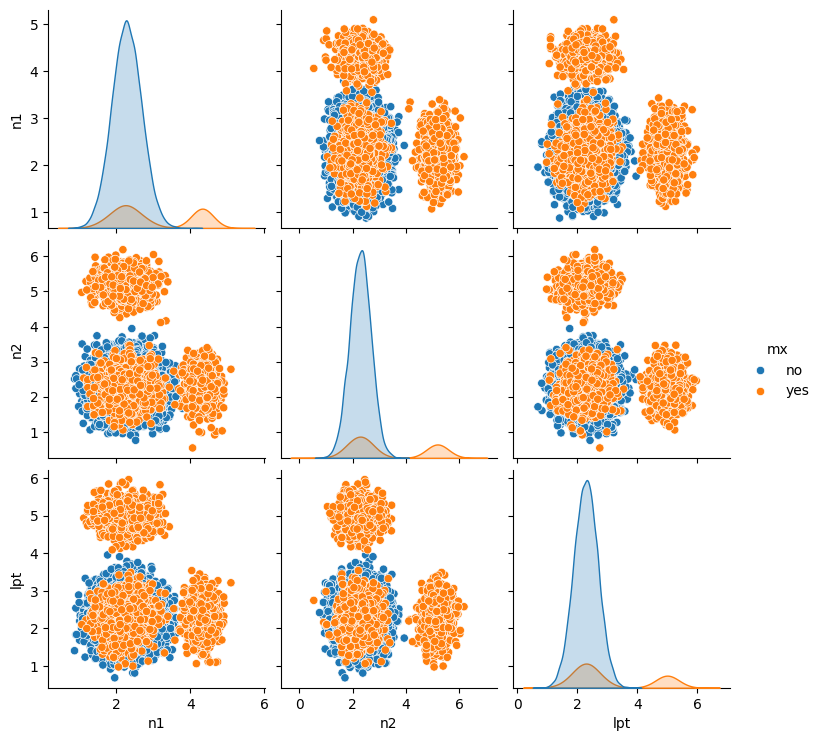

In [190]:
sns.pairplot(df,hue='mx');

In [191]:
fig = px.scatter_3d(df, x='n1', y='n2', z='lpt', color='mx',opacity=0.7,
                     title="vibes (inches per second)",
                     labels={'n1': 'n1', 'n2': 'n2', 'lpt': 'lpt axis'})

fig.update_layout(width=1200,height=900)
fig.show()

# K-means

In [192]:
X = df[["n1", "n2", "lpt"]]

model = KMeans(n_clusters=4, random_state=1, n_init=10)
df["cluster"] = model.fit_predict(X)

df["actual"] = np.where(df["mx"] == "no", 0, 1)

mapping = df.groupby("cluster")["actual"].mean()

preds = df["cluster"].map(lambda c: 1 if mapping[c] > .5 else 0)

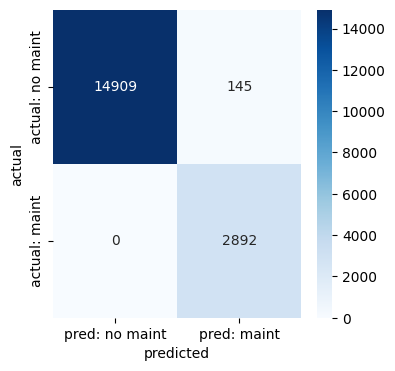

In [193]:
cm = confusion_matrix(df["actual"], preds)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=["pred: no maint", "pred: maint"],yticklabels=["actual: no maint", "actual: maint"])
plt.xlabel("predicted")
plt.ylabel("actual");

In [194]:
print(classification_report(df["actual"], preds, target_names=["no maint", "maint required"]))

                precision    recall  f1-score   support

      no maint       1.00      0.99      1.00     15054
maint required       0.95      1.00      0.98      2892

      accuracy                           0.99     17946
     macro avg       0.98      1.00      0.99     17946
  weighted avg       0.99      0.99      0.99     17946



- Precision for maint required is 0.95, so some false positives exist.

- Recall for maint required is 1.00, so no false negatives, meaning all actual maint required cases were correctly identified

# Conclusion

**Fewer Unexpected Repairs**
- If you know which conditions lead to maintenance, you can fix issues before they cause serious problems.

**More Aircraft Ready to Fly**
- Preventative maintenance means fewer aircraft grounded unexpectedly, improving availability.

**Smarter Scheduling**
- Maintenance teams can plan ahead, ensuring parts and personnel are ready before issues happen.

**Lower Costs & Faster Turnaround**
- Fixing small problems early is cheaper and faster than waiting for major failures